# Bibliotecas


---



In [44]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_validate
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from yellowbrick.model_selection import FeatureImportances

from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.under_sampling import NearMiss

import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np

# Extração


---



In [ ]:
url = 'data\TelecomX_Data_Limpo.csv'

df = pd.read_csv(url, sep=';')

In [47]:
df

,ID,Churn,Genero,Senior,Parceiro,Dependentes,Meses_Contrato,Assinatura_Servico_Telefonico,Assinatura_Multiplas_Linhas,Assinatura_Internet,...,Assinatura_Protecao_Dispositivo,Assinatura_Suporte_Tec,Assinatura_Tv_Cabo,Assinatura_Streaming,Contrato,Fatura_online,Forma_de_pagamento,Contas_Mensal,Contas_Geral,Contas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.40,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.40,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.90,1.84
7028,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.70,2.84
7029,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7030,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               7032 non-null   object 
 1   Churn                            7032 non-null   object 
 2   Genero                           7032 non-null   object 
 3   Senior                           7032 non-null   int64  
 4   Parceiro                         7032 non-null   object 
 5   Dependentes                      7032 non-null   object 
 6   Meses_Contrato                   7032 non-null   int64  
 7   Assinatura_Servico_Telefonico    7032 non-null   object 
 8   Assinatura_Multiplas_Linhas      7032 non-null   object 
 9   Assinatura_Internet              7032 non-null   object 
 10  Assinatura_Seguranca_Online      7032 non-null   object 
 11  Assinatura_Backup                7032 non-null   object 
 12  Assinatura_Protecao_

# Remoção de colunas irrelevantes


---

O objetivo dessa etapa é:

- Remover colunas irrelevantes para a predição.
- Entender a relação entre as variáveis de entrada, buscando redundâncias.

Colunas de identificadores únicos (por exemplo, o ID) não oferecem valor para a análise, podendo até piorar o desempenho de modelos preditivos.

Outro tipo de coluna irrelevante são colunas redundantes, sua identificação pode ser realizada com base na correlação das váriaveis umas com as outras.

In [49]:
# Remoção da coluna 'ID'
df.drop(columns='ID', inplace=True)

In [50]:
# Análise de entradas quantitativas contínuas
df.describe(include='float')

,Contas_Mensal,Contas_Geral,Contas_Diarias
count,7032.000000,7032.000000,7032.000000
mean,64.798208,2283.300441,2.159891
std,30.085974,2266.771362,1.002955
min,18.250000,18.800000,0.610000
25%,35.587500,401.450000,1.187500
50%,70.350000,1397.475000,2.340000
75%,89.862500,3794.737500,2.992500
max,118.750000,8684.800000,3.960000


In [51]:
# Análise da correlação de entradas quantitativas contínuas
df[df.describe(include='float').columns].corr()

,Contas_Mensal,Contas_Geral,Contas_Diarias
Contas_Mensal,1.000000,0.651065,0.999996
Contas_Geral,0.651065,1.000000,0.651080
Contas_Diarias,0.999996,0.651080,1.000000


In [52]:
# Escolha pela remoção da coluna 'Contas_Diarias' devido a redundância com 'Contas_Mensal', com correlação expressiva (acima de 99%)
df.drop('Contas_Diarias', axis = 1, inplace=True)

In [53]:
# Análise de entradas qualitativas do tipo 'object'
df.describe(include='O')

,Churn,Genero,Parceiro,Dependentes,Assinatura_Servico_Telefonico,Assinatura_Multiplas_Linhas,Assinatura_Internet,Assinatura_Seguranca_Online,Assinatura_Backup,Assinatura_Protecao_Dispositivo,Assinatura_Suporte_Tec,Assinatura_Tv_Cabo,Assinatura_Streaming,Contrato,Fatura_online,Forma_de_pagamento
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,No,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,5163,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


In [54]:
# Visualização dos valores únicos não-binários das entradas qualitativas.
colunas_categoricas = [coluna for coluna in df.columns if len(df[coluna].unique()) <= 5]

for coluna in colunas_categoricas:
  if len(df[coluna].unique()) > 2:
    print(f'{coluna} = {df[coluna].unique()} - {len(df[coluna].unique())}\n')

Assinatura_Multiplas_Linhas = ['No' 'Yes' 'No phone service'] - 3

Assinatura_Internet = ['DSL' 'Fiber optic' 'No'] - 3

Assinatura_Seguranca_Online = ['No' 'Yes' 'No internet service'] - 3

Assinatura_Backup = ['Yes' 'No' 'No internet service'] - 3

Assinatura_Protecao_Dispositivo = ['No' 'Yes' 'No internet service'] - 3

Assinatura_Suporte_Tec = ['Yes' 'No' 'No internet service'] - 3

Assinatura_Tv_Cabo = ['Yes' 'No' 'No internet service'] - 3

Assinatura_Streaming = ['No' 'Yes' 'No internet service'] - 3

Contrato = ['One year' 'Month-to-month' 'Two year'] - 3

Forma_de_pagamento = ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)'] - 4



# Ajuste de classes


---

Ao analisar os valores únicos de colunas qualitativas não-binárias, foi possível identificar uma reincidência de categorias como *'No'* e *'No internet service'* ou *'No phone service'*.

Embora sejam classes relevantes, esse tipo de informação já são dispostas, respectivamente, nas colunas *'Assinatura_Internet'* e *'Assinatura_Servico_Telefonico'*. Como pode ser visto abaixo:

In [55]:
# A informação de não possuir assinatura telefônica é repetida na coluna 'Assinatura_Multiplas_Linhas'
df.groupby('Assinatura_Servico_Telefonico')['Assinatura_Multiplas_Linhas'].value_counts().reset_index()

,Assinatura_Servico_Telefonico,Assinatura_Multiplas_Linhas,count
0,No,No phone service,680
1,Yes,No,3385
2,Yes,Yes,2967


In [56]:
# Semelhante ao caso anterior, resultados limitados por '.tail()' para focar nos casos 'Assinatura_Internet' igual a 'No'
df.groupby('Assinatura_Internet')[['Assinatura_Protecao_Dispositivo','Assinatura_Suporte_Tec', 'Assinatura_Tv_Cabo',
                                   'Assinatura_Streaming', 'Assinatura_Internet']].value_counts().reset_index().tail(3)

,Assinatura_Internet,Assinatura_Protecao_Dispositivo,Assinatura_Suporte_Tec,Assinatura_Tv_Cabo,Assinatura_Streaming,count
30,Fiber optic,No,Yes,No,Yes,46
31,Fiber optic,Yes,Yes,Yes,No,43
32,No,No internet service,No internet service,No internet service,No internet service,1520


Simplificar esses dados auxilia na redução de colunas, uma vez que entradas qualitativas não binárias seriam convertidas em n-entradas/n-colunas ao realizar a codificação (One-Hot Encoding).

Os elementos *'No internet service'* e *'No phone service'* foram substituidos pela classe *'No'*. Tornando essas entradas em classes binárias.

In [57]:
df[colunas_categoricas] = df[colunas_categoricas].replace(['No internet service', 'No phone service'], 'No')

# Encoding

---

Transformação das variáveis categóricas em formato numérico, tornando-as compatíveis com os modelos.

Para colunas binárias a transformação é simplificada:

1. Coluna *'Genero'* é convertida de classes *'**Male**'* e *'**Female**'* para **0** e **1**.
2. Demais colunas possuem classes ***'No'*** e ***'Yes'***, convertidas para **0** e **1**.

In [58]:
# Transformação de variáveis categóricas binárias em formato númerico

df['Genero'] = df['Genero'].replace(['Male', 'Female'], [0, 1])

df[colunas_categoricas] = df[colunas_categoricas].apply(lambda x: x.replace(['No', 'Yes'], [0, 1]) if len(x.unique()) == 2 else x)

Para colunas não-binárias os dados são transformados utilizando o codificador **OneHotEncoder**. Esse *encoder* segue o método de codificação **One-Hot**, que transforma cada uma das classes das variáveis categóricas em novas colunas, utilizando o valor **0** para representar a ausência da característica e **1** para a presença da característica.

Um novo dataframe é gerado com as novas colunas e as anteriores que não foram alteradas, possuindo as seguintes características:

- Colunas com prefixo *'onehotencoder__'* são colunas geradas com base nas classes da respectiva varíavel.

- Colunas com o prefixo *'remainder__'* não foram alteradas.

- Todas possuem tipo númerico.

In [59]:
# Codificação de colunas categóricas não-binárias em formato númerico, utilizando one-hot enconding.

colunas = df.columns

one_hot = make_column_transformer((OneHotEncoder(drop = 'if_binary'), ['Assinatura_Internet', 'Contrato', 'Forma_de_pagamento']),
    remainder = 'passthrough',
    sparse_threshold=0
    )

df_codificado = one_hot.fit_transform(df)

df_codificado = pd.DataFrame(df_codificado, columns = one_hot.get_feature_names_out(colunas))
df_codificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 27 columns):
 #   Column                                                       Non-Null Count  Dtype 
---  ------                                                       --------------  ----- 
 0   onehotencoder__Assinatura_Internet_DSL                       7032 non-null   object
 1   onehotencoder__Assinatura_Internet_Fiber optic               7032 non-null   object
 2   onehotencoder__Assinatura_Internet_No                        7032 non-null   object
 3   onehotencoder__Contrato_Month-to-month                       7032 non-null   object
 4   onehotencoder__Contrato_One year                             7032 non-null   object
 5   onehotencoder__Contrato_Two year                             7032 non-null   object
 6   onehotencoder__Forma_de_pagamento_Bank transfer (automatic)  7032 non-null   object
 7   onehotencoder__Forma_de_pagamento_Credit card (automatic)    7032 non-null   object
 8 

Por fim é utilizado o **LabelEncoder**, codificador voltado para a conversão dos valores da variável alvo entre 0 e n-1 classes. Nesse caso, a coluna 'Churn', com apenas duas classes.

Sendo assim, separamos as variáveis de entrada em **'x'** e a variável alvo/saída em **'y'**. Antes de aplicar o codificador:

In [60]:
label_encoder = LabelEncoder()

y = label_encoder.fit_transform(df_codificado['remainder__Churn'])

x = df_codificado.drop('remainder__Churn', axis=1)

# Análise de Correlação


---

A Matriz de Correlação, utilizada anteriormente para visualizar a relação entre as váriaveis de entrada, também deve ser utilizada para verificar a correlação entre as váriaveis de entrada e váriavel alvo.

Dessa forma, é possível identificar as relações e variáveis com maior correlação com a evasão:

- As correlações que mais influenciam na evasão são aquelas que mais se aproximan de 1 ou -1.

In [61]:
df_codificado.corr()['remainder__Churn'].sort_values(ascending=False)

remainder__Churn                                               1.000000
onehotencoder__Contrato_Month-to-month                         0.404565
onehotencoder__Assinatura_Internet_Fiber optic                 0.307463
onehotencoder__Forma_de_pagamento_Electronic check             0.301455
remainder__Contas_Mensal                                       0.192858
remainder__Fatura_online                                       0.191454
remainder__Senior                                              0.150541
remainder__Assinatura_Tv_Cabo                                  0.063254
remainder__Assinatura_Streaming                                0.060860
remainder__Assinatura_Multiplas_Linhas                         0.040033
remainder__Assinatura_Servico_Telefonico                       0.011691
remainder__Genero                                              0.008545
remainder__Assinatura_Protecao_Dispositivo                    -0.066193
remainder__Assinatura_Backup                                  -0

# Análises Direcionadas


---

A seguir estão as relações entre a evasão de clientes e o tempo de contrato/total gasto.

In [62]:
fig0 = px.box(df, x="Meses_Contrato", color="Churn", title="Distribuição de tempo de contrato (em meses) por evasão de clientes")

fig0.show()

fig1 = px.box(df, x="Contas_Geral", color="Churn", title="Distribuição de gastos totais de clientes por evasão")

fig1.show()

# Separação de dados


---

Utilizando o método Holdout, numa proporção de 70% do conjunto para treino e 30% para teste.

In [63]:
# Stratify mantém a proporção de dados, random_state para reprodutibilidade
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, stratify = y, random_state = 1)

# Normalização


---

O método escolhido para normalização foi o Z-Score. Definido por:

$$z = \frac{x - \mu}{\sigma}$$

Onde:
  - x = Amostra do conjunto
  - $\mu$ = Média do conjunto
  - $\sigma$ = Desvio padrão do conjunto

A classe *StandardScaler* do *sklearn.preprocessing* permite criar objetos que aprendem os parâmetros de normalização (como média e desvio padrão) a partir dos dados de treino, e reutilizá-los para transformar novos dados de forma consistente em outras etapas do algoritmo.

In [64]:
scaler = StandardScaler()

# Ajuste da normalização
X_train_scaled = scaler.fit_transform(X_train)

# Reutilização para normalização dos dados de teste
X_test_scaled = scaler.transform(X_test)

# Balanceamento de Classes


---

Como pode ser visto abaixo, os dados apresentam um desbalanceamento considerável entre às classes da váriavel alvo. Que pode afetar o desempenho do modelo.

In [65]:
print('Total:')
print('Evasão =',np.unique(y, return_counts=True)[0])
print('Contagem =',np.unique(y, return_counts=True)[1])

Total:
Evasão = [0 1]
Contagem = [5163 1869]


In [66]:
print('Conjunto de treino:')
print('Evasão =',np.unique(y_train, return_counts=True)[0])
print('Contagem =',np.unique(y_train, return_counts=True)[1])

Conjunto de treino:
Evasão = [0 1]
Contagem = [3614 1308]


## Undersampling e NearMiss

O método utilizado para mitigar esse questão foi o Undersampling, consistindo em reduzir a quantidade de dados da classe que possui maior frequência até que tenha a mesma quantidade da classe de menor frequência.

Utilizando a técnica NearMiss, as amostra escolhidas são de um padrão bem parecido com os elementos que já existem na outra classe. Assim, o modelo pode identificar em nuances qual é a diferença de uma classe para a outra.

In [67]:
# Versão 3 do NearMiss
undersample = NearMiss(version=3)

# Aplicado sobre os dados normalizados
X_balanceado, y_balanceado = undersample.fit_resample(X_train_scaled, y_train)

# Modelos

---

Os modelos selecionados foram: Regressão Lógistica e Árvore de Decisão.

## GridSearchCV e Validação Cruzada

Para otimização de hiperparâmetros dos modelos foi utilizado o GridSearchCV em conjunto com a estratégia de validação cruzada, buscando evitar padrões no dataset de treinamento.

In [68]:
# Validação cruzada do tipo StratifiedKFold, que considera a proporção dos dados.
skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)

In [69]:
# Hiperparâmetros para Árvore de Decisão

param_grid = {
    'max_depth': [None, 5, 10, 15, 20, 30],
    'min_samples_leaf': [1, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10, 15, 20]
    }

model_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=param_grid, scoring='precision', cv=skf)

model_grid.fit(X_balanceado, y_balanceado)

model_grid.best_params_

{'max_depth': 5, 'min_samples_leaf': 8, 'min_samples_split': 2}

In [70]:
# Hiperparâmetros para Regressão Logística

param_grid = {
    'max_iter': [1000, 2000, 3000, 4000, 5000]
    }

skf = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 5)

model_grid = GridSearchCV(LogisticRegression(random_state=42), param_grid=param_grid, scoring='precision', cv=skf)

model_grid.fit(X_balanceado, y_balanceado)

model_grid.best_params_

{'max_iter': 1000}

## Métricas dos modelos em validação cruzada

Para avaliar as métricas dos modelos com os Hiperparâmetros gerados pelo GridSearchCV, foi utilizado *cross_validate* do *sklearn.model_selection* em conjunto com o StratifiedKFold definido anteriormente.

Essa abordagem leva em consideração todo o conjunto de dados com 'Churn' desbalanceado, buscando refletir as proporções reais dos dados.

In [71]:
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'] # Métricas

modelo = DecisionTreeClassifier(
    max_depth = 5,
    min_samples_leaf = 8,
    min_samples_split = 2,
    random_state=1
    )

pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('arvore', modelo)])

resultados_tree = cross_validate(pipeline, x, y, cv=skf, scoring = scoring)

for metric in scoring:
    print(f"{metric}: {resultados_tree['test_' + metric].mean():.3f}")

accuracy: 0.757
precision: 0.533
recall: 0.697
f1: 0.604
roc_auc: 0.806


In [72]:
modelo = LogisticRegression(random_state=42, max_iter=5000) # max_iter ampliado para output limpo

pipeline = imbpipeline([('undersample', NearMiss(version=3)), ('log_reg', modelo)])

resultados_logreg = cross_validate(pipeline, x, y, cv=skf, scoring = scoring)

for metric in scoring:
    print(f"{metric}: {resultados_logreg['test_' + metric].mean():.3f}")

accuracy: 0.742
precision: 0.511
recall: 0.758
f1: 0.610
roc_auc: 0.825


# Criação dos modelos finais e avaliação


---

Três modelos foram criados:

- DummyClassifier: Modelo de classificação base, definição de um críterio de comparação inicial.

- DecisionTreeClassifier: Modelo de classificação por árvore de decisão.

- LogisticRegression: Modelo de classificação por Regressão Logística.

A matrix de confusão, o *classification_report* (que constroi um relatório demonstrando as principais métricas de classificação) e o cálculo de ROC AUC (*roc_auc_score*) foram utilizados em cada um dos modelos.

A escolha dos modelos se deu devido a facilidade de treinamento e ajuste, além de serem modelos clássicos de classificação onde ambos possuem uma documentação detalhada sobre seu funcionamento.


---

*Observação: Os dados de teste utilizados para avaliação dos modelos já estão normalizados. Para testes com outros conjuntos de dados é necessário aplicar a normalização antes ou a criação de uma pipeline que deve incluir o normalizador e o modelo.



roc auc: 0.5 

              precision    recall  f1-score   support

           0       0.73      1.00      0.85      1549
           1       0.00      0.00      0.00       561

    accuracy                           0.73      2110
   macro avg       0.37      0.50      0.42      2110
weighted avg       0.54      0.73      0.62      2110



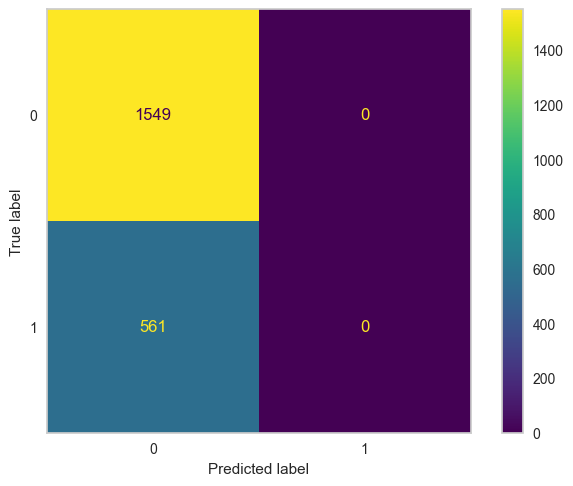

In [73]:
# Modelo Base

# Treino
dummy = DummyClassifier()
dummy.fit(X_balanceado, y_balanceado)

# Previsão
y_previsto = dummy.predict(X_test_scaled)

# Métricas
print("roc auc:", roc_auc_score(y_test, y_previsto), '\n')
print(classification_report(y_test, y_previsto,  zero_division=0))

ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);
plt.grid(False)
plt.show()

roc auc: 0.6935329446057429 

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1549
           1       0.53      0.57      0.55       561

    accuracy                           0.75      2110
   macro avg       0.68      0.69      0.69      2110
weighted avg       0.76      0.75      0.75      2110



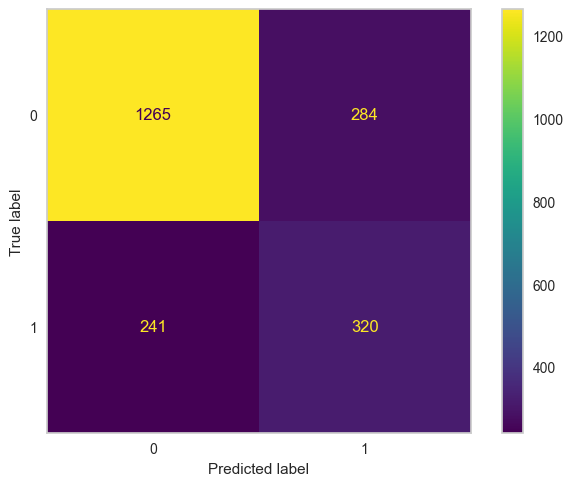

In [74]:
# Árvore de Decisão

# Treino
modelo_tree = DecisionTreeClassifier(max_depth = 5,
                                min_samples_leaf = 8,
                                min_samples_split = 2, random_state=1
                                )

modelo_tree.fit(X_balanceado, y_balanceado)

# Previsão
y_previsto = modelo_tree.predict(X_test_scaled)

# Métricas
print("roc auc:", roc_auc_score(y_test, y_previsto), '\n')
print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);
plt.grid(False)
plt.show()

roc auc: 0.7549387851860034 

              precision    recall  f1-score   support

           0       0.88      0.82      0.85      1549
           1       0.58      0.69      0.63       561

    accuracy                           0.79      2110
   macro avg       0.73      0.75      0.74      2110
weighted avg       0.80      0.79      0.79      2110



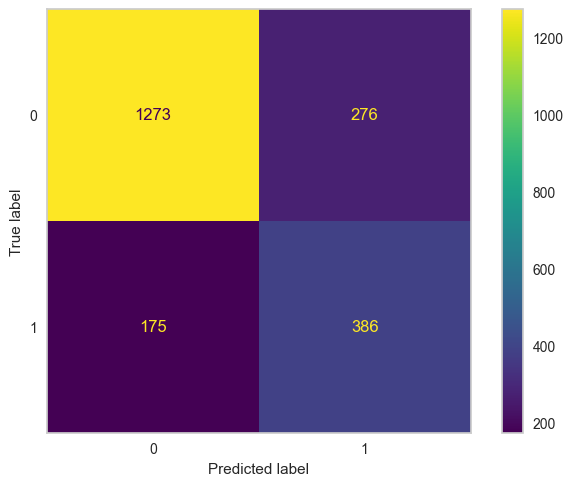

In [75]:
# Regressão Logística

# Treino
modelo_logreg = LogisticRegression(max_iter=1000, random_state=42)
modelo_logreg.fit(X_balanceado, y_balanceado)

# Previsão
y_previsto = modelo_logreg.predict(X_test_scaled)

# Métricas
print("roc auc:", roc_auc_score(y_test, y_previsto), '\n')
print(classification_report(y_test, y_previsto))
ConfusionMatrixDisplay.from_predictions(y_test, y_previsto);
plt.grid(False)
plt.show()

Ambos os modelos performaram de maneira semelhante, mas o modelo de **Regressão Lógistica** obteve o melhor desempenho.

Quando comparamos as métricas entre os dois modelos principais ao modelo base é possível notar diferenças significativas em performance. Especialmente quando analisamos valores de **Precisão**, **Recall**, **F1-Score** e a curva **ROC-AUC**.

É interessante destacar como a acurácia não é uma métrica ideal para a avaliação destes modelos, pois ela reflete a taxa de acerto geral, e nosso foco está na identificação de possíveis Churns.

O modelo de regressão, porém, atingiu apenas 0.58 de precisão e 0.75 de ROC AUC para identificação de evasão.

# Análise de Importância das Variáveis



---

Abaixo é possível visualizar graficamente quais foram as variáveis mais relevantes para a previsão de evasão em cada modelo, utilizando o *FeatureImportances* do *yellowbrick.model_selection*.

## Árvore de Decisão

Na Árvore de Decisão, as variáveis mais importantes são diretamentes exibidas. É possível identificar como apenas as 10 primeiras variáveis estão com graus relevantes de importância. Dentre elas o tempo de contrato em mês, contas geral e mensal e outros.

Um caso de estudo para esse modelo é considerar a remoção de algumas dessas categorias não relevantes.

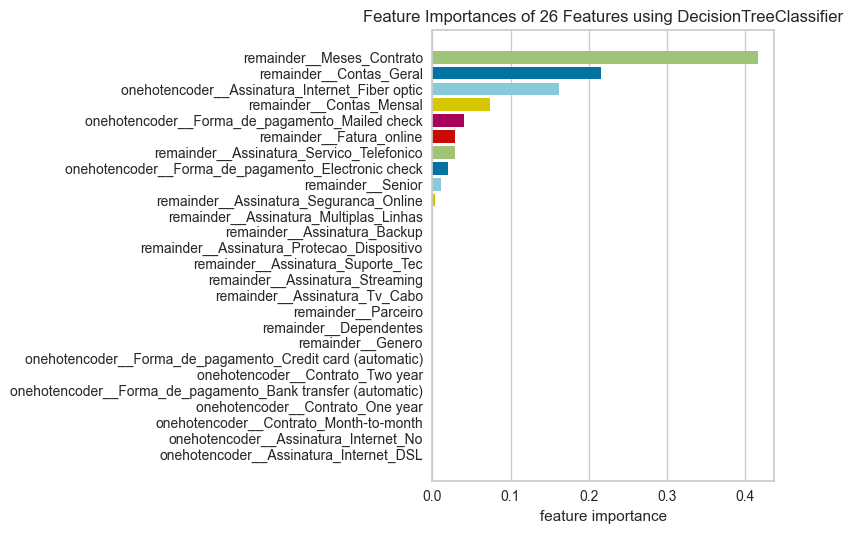

<Axes: title={'center': 'Feature Importances of 26 Features using DecisionTreeClassifier'}, xlabel='feature importance'>

In [76]:
viz = FeatureImportances(modelo_tree, relative=False)

viz.fit(X_train, y_balanceado)
viz.show()

## Regressão Logística

Na Regressão Logística os dados exibidos são os coeficientes do modelo. Essa representação se assemelha visualmente a uma matriz de correlação, embora tenha um significado estatístico diferente.

Nesta visualização, quanto mais próximo de 1 ou -1 estiver o coeficiente, maior é a influência da variável correspondente no modelo.

Por exemplo, o tempo de contrato apresenta um coeficiente negativo, o que indica que quanto maior o tempo de contrato, menor é a chance da evasão do cliente.

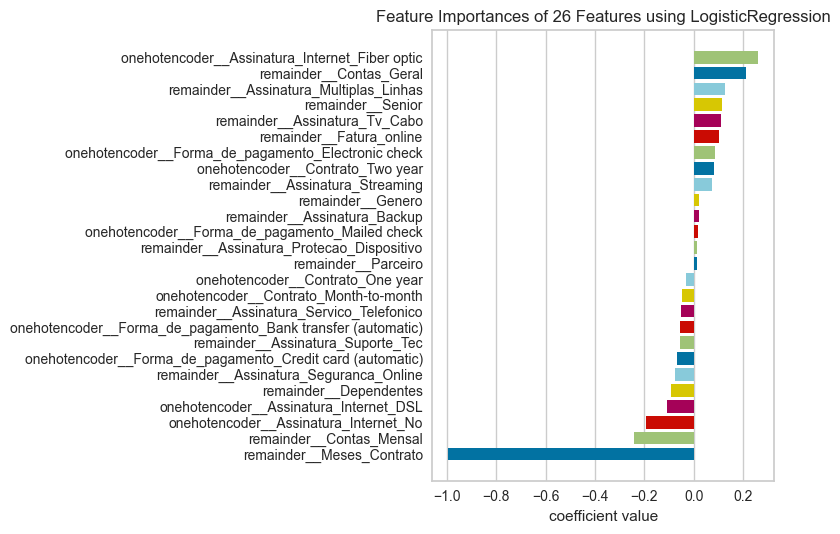

<Axes: title={'center': 'Feature Importances of 26 Features using LogisticRegression'}, xlabel='coefficient value'>

In [77]:
viz = FeatureImportances(modelo_logreg, relative=False, stack=False)

viz.fit(X_train, y_balanceado)
viz.show()

# Conclusão

## Principais agravantes:

Baseado nos resultados de ambos os modelos, os principais fatores relacionados a evasão de clientes são:

<br>

- **Tempo de contrato**
  - Clientes com pouco tempo de contrato possuem uma maior tendência de Churn.


- **Gastos mensais**
  - Quanto maior o gasto mensal, maior a probabilidade de evasão.


- **Assinatura de internet baseada em fibra óptica**
  - Especialmente quando comparada a clientes sem nenhuma assinatura ou com tipo DSL.


- **Cheques-eletrônicos**
  - Clientes que utilizam esse meio de pagamento tem maior tendência a churn.

## Estratégias de retenção:

Estratégias podem incluir, mas não apenas:

<br>

1. **Incentivar contratos de um ano;**

  Os resultados dos modelos indicam uma menor probabilidade de Churn em clientes com maiores tempos de contratos, especialmente com o tipo de plano anual.

2. **Revisão no preço e serviços de assinaturas;**

  - Internet - Fibra óptica
  - Telefônia - Multiplas linhas
  - Tv-a-cabo

3. **Ações específicas nos primeiros meses de contrato;**

4. **Revisão dos meios de pagamento;**

  - Cheques-eletrônicos e por e-mail.

END